In [ ]:
import torch
import torch_directml
dml = torch_directml.device()

In [ ]:
tensor1 = torch.tensor([1]).to(dml) # Note that dml is a variable, not a string!
tensor2 = torch.tensor([2]).to(dml)

In [ ]:
dml_algebra = tensor1 + tensor2
dml_algebra.item()

3

In [ ]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)

        # Load audio
        waveform, sample_rate = torchaudio.load(file_path)
        dataset.append([waveform, sample_rate, label])

    return dataset

In [ ]:
import os
import re
root = '/mnt/c/Downloads/'

re_mcr = r'^rec_mcr'
mcr = []
for i in os.listdir(root):
    if re.search(re_mcr, i):
        # print(i)
        mcr += load_audio_files(root+i+'/', 'microwave')

In [ ]:
import os
import re
root = './cs8803-mci-audio/'

re_blender = r'^blender'
blender = []
for i in os.listdir(root):
    if re.search(re_blender, i):
        blender += load_audio_files(root+i+'/', 'blender')

nothing = load_audio_files(root+'nothing/', 'nothing')


In [ ]:
print(f'Length of microwave dataset: {len(mcr)}')

Length of microwave dataset: 100


In [ ]:
print(f'Length of blender dataset: {len(blender)}')
print(f'Length of nothing dataset: {len(nothing)}')

Length of blender dataset: 10
Length of nothing dataset: 2


In [ ]:
print(len(mcr[0][0][0]))

220500


In [ ]:
yes_waveform = mcr[0][0]
yes_sample_rate = mcr[0][1]
print(f'Yes Waveform: {yes_waveform}')
print(f'Yes Sample Rate: {yes_sample_rate}')
print(f'Yes Label: {mcr[0][2]}\n')

Yes Waveform: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Yes Sample Rate: 44100
Yes Label: microwave



In [ ]:
train_blender = torch.utils.data.DataLoader(blender, batch_size=1,
                                            shuffle=True, num_workers=0)
train_nothing = torch.utils.data.DataLoader(nothing, batch_size=1,
                                            shuffle=True, num_workers=0)

In [ ]:
yes_waveform = blender[0][0]
yes_sample_rate = blender[0][1]
print(f'Yes Waveform: {yes_waveform}')
print(f'Yes Sample Rate: {yes_sample_rate}')
print(f'Yes Label: {blender[0][2]}\n')

no_waveform = nothing[0][0]
no_sample_rate = nothing[0][1]
print(f'No Waveform: {no_waveform}')
print(f'No Sample Rate: {no_sample_rate}')
print(f'No Label: {nothing[0][2]}')

Yes Waveform: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0391, 0.0078, 0.0000]])
Yes Sample Rate: 8000
Yes Label: blender

No Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0078, -0.0078, -0.0078]])
No Sample Rate: 8000
No Label: nothing


In [ ]:
def show_waveform(waveform, sample_rate, label):
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))
    new_sample_rate = sample_rate

    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())

Waveform: tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
Sample rate: 44100
Labels: yes 

Shape of transformed waveform: torch.Size([1, 220500])
Sample rate: 44100


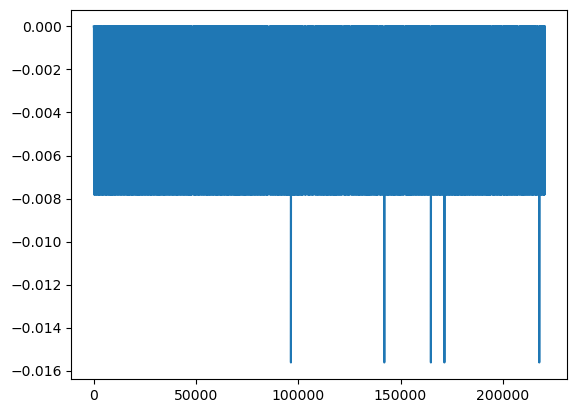

In [ ]:
show_waveform(yes_waveform, yes_sample_rate, 'yes')

Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0078, -0.0078, -0.0078]])
Sample rate: 8000
Labels: no 

Shape of transformed waveform: torch.Size([1, 40000])
Sample rate: 8000


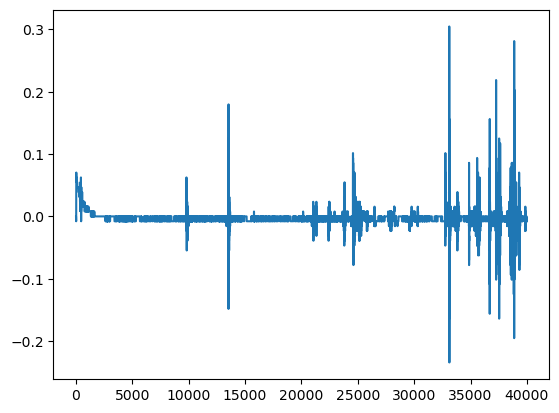

In [ ]:
show_waveform(no_waveform, no_sample_rate, 'no')

In [ ]:
def show_spectrogram(waveform_classA, waveform_classB):
    yes_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of yes spectrogram: {}".format(yes_spectrogram.size()))

    no_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of no spectrogram: {}".format(no_spectrogram.size()))

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Features of {}".format('no'))
    plt.imshow(yes_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

    plt.subplot(1, 2, 2)
    plt.title("Features of {}".format('yes'))
    plt.imshow(no_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

In [ ]:
show_spectrogram(yes_waveform, no_waveform)

NameError: name 'no_waveform' is not defined

In [ ]:
def show_melspectrogram(waveform,sample_rate):
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mel_spectrogram.size()))

    plt.figure()
    plt.imshow(mel_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Shape of spectrogram: torch.Size([1, 128, 1103])


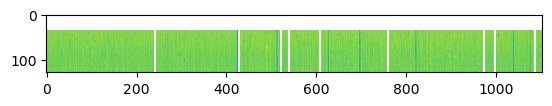

In [ ]:
show_melspectrogram(yes_waveform, yes_sample_rate)

Shape of spectrogram: torch.Size([1, 128, 201])


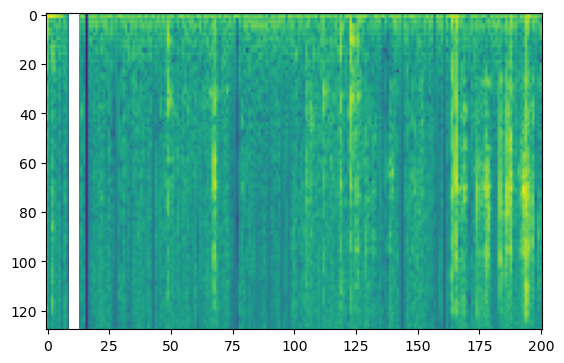

In [ ]:
show_melspectrogram(no_waveform, no_sample_rate)

In [ ]:
def show_mfcc(waveform,sample_rate):
    mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform)
    print("Shape of spectrogram: {}".format(mfcc_spectrogram.size()))

    plt.figure()
    fig1 = plt.gcf()
    plt.imshow(mfcc_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')

    plt.figure()
    plt.plot(mfcc_spectrogram.log2()[0,:,:].numpy())
    plt.draw()

Shape of spectrogram: torch.Size([1, 40, 201])


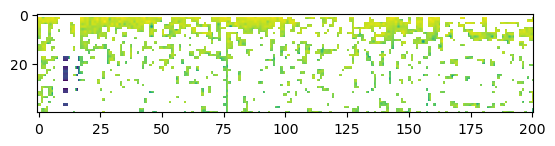

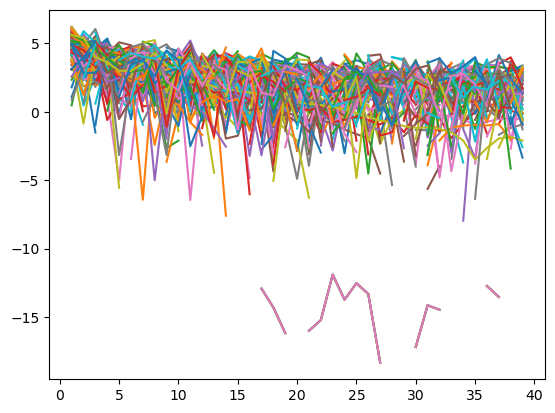

In [ ]:
show_mfcc(no_waveform,  no_sample_rate)

Shape of spectrogram: torch.Size([1, 40, 201])


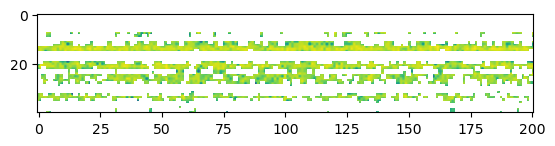

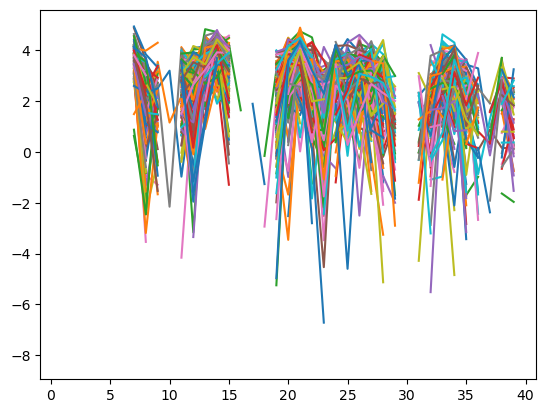

In [ ]:
show_mfcc(yes_waveform,  yes_sample_rate)

In [ ]:
def create_spectrogram_images(trainloader, label_dir):
    #make directory
    directory = f'./data/spectrograms/{label_dir}/'
    if(os.path.isdir(directory)):
        print("Data exists for", label_dir)
    else:
        os.makedirs(directory, mode=0o777, exist_ok=True)

        for i, data in enumerate(trainloader):

            waveform = data[0]
            sample_rate = data[1][0]
            label = data[2]

            # create transformed waveforms
            spectrogram_tensor = torchaudio.transforms.Spectrogram()(waveform)

            fig = plt.figure()
            plt.imsave(f'./data/spectrograms/{label_dir}/spec_img{i}.png', spectrogram_tensor[0].log2()[0,:,:].numpy(), cmap='viridis')

In [ ]:
def create_mfcc_images(trainloader, label_dir):
    #make directory
    os.makedirs(f'./data/mfcc_spectrograms/{label_dir}/', mode=0o777, exist_ok=True)

    for i, data in enumerate(trainloader):

        waveform = data[0]
        sample_rate = data[1][0]
        label = data[2]

        mfcc_spectrogram = torchaudio.transforms.MFCC(sample_rate= sample_rate)(waveform)

        plt.figure()
        fig1 = plt.gcf()
        plt.imshow(mfcc_spectrogram[0].log2()[0,:,:].numpy(), cmap='viridis')
        plt.draw()
        fig1.savefig(f'./data/mfcc_spectrograms/{label_dir}/spec_img{i}.png', dpi=100)

        #spectorgram_train.append([spectrogram_tensor, label, sample_rate, ID])

In [ ]:
create_spectrogram_images(train_blender, 'blender')
create_spectrogram_images(train_nothing, 'nothing')

/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/matplotlib/colors.py:1370: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/nschdeva/anaconda3/envs/mci/lib/python3.9/site-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import pandas as pd
import os

In [ ]:
data_path = './data/spectrograms' #looking in subfolder train

yes_no_dataset = datasets.ImageFolder(
    root=data_path,
    transform=transforms.Compose([transforms.Resize((201,201)),
                                  transforms.ToTensor()
                                  ])
)
print(yes_no_dataset)

Dataset ImageFolder
    Number of datapoints: 12
    Root location: ./data/spectrograms
    StandardTransform
Transform: Compose(
               Resize(size=(201, 201), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [ ]:
class_map=yes_no_dataset.class_to_idx

print("\nClass category and index of the images: {}\n".format(class_map))


Class category and index of the images: {'blender': 0, 'nothing': 1}



In [ ]:
#split data to test and train
#use 80% to train
train_size = int(0.8 * len(yes_no_dataset))
test_size = len(yes_no_dataset) - train_size
yes_no_train_dataset, yes_no_test_dataset = torch.utils.data.random_split(yes_no_dataset, [train_size, test_size])

print("Training size:", len(yes_no_train_dataset))
print("Testing size:",len(yes_no_test_dataset))

Training size: 9
Testing size: 3


In [ ]:
from collections import Counter

# labels in training set
train_classes = [label for _, label in yes_no_train_dataset]
Counter(train_classes)

Counter({0: 8, 1: 1})

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    yes_no_train_dataset,
    batch_size=15,
    num_workers=2,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    yes_no_test_dataset,
    batch_size=15,
    num_workers=2,
    shuffle=True
)

In [ ]:
td = train_dataloader.dataset[0][0][0][0]
print(td)

tensor([0.5647, 0.7412, 0.6471, 0.6471, 0.7176, 0.6784, 0.5725, 0.7294, 0.6353,
        0.6157, 0.5333, 0.7608, 0.7294, 0.5529, 0.6471, 0.6784, 0.6980, 0.6667,
        0.6784, 0.6980, 0.6549, 0.5529, 0.6980, 0.7294, 0.6235, 0.6784, 0.6667,
        0.6784, 0.4549, 0.7490, 0.7098, 0.6471, 0.4745, 0.7294, 0.7412, 0.5529,
        0.6784, 0.6667, 0.6863, 0.4745, 0.7490, 0.7176, 0.6667, 0.6157, 0.6980,
        0.6235, 0.7294, 0.6039, 0.6863, 0.5529, 0.7412, 0.6863, 0.5843, 0.6549,
        0.7176, 0.6863, 0.5843, 0.6863, 0.7294, 0.6784, 0.6784, 0.5725, 0.6980,
        0.7098, 0.7098, 0.6980, 0.4941, 0.6980, 0.6863, 0.6549, 0.6157, 0.6667,
        0.7294, 0.6353, 0.5451, 0.6471, 0.7725, 0.7176, 0.6667, 0.6667, 0.6235,
        0.6235, 0.6784, 0.6353, 0.6471, 0.7176, 0.7176, 0.5529, 0.6980, 0.6980,
        0.6980, 0.7098, 0.6235, 0.6157, 0.6471, 0.7176, 0.5137, 0.7098, 0.7412,
        0.6980, 0.6471, 0.6784, 0.6667, 0.6549, 0.6353, 0.7922, 0.6471, 0.5255,
        0.6353, 0.6667, 0.7804, 0.6549, 

In [ ]:
import torch_directml
dev = torch_directml.device(0)
print('Using {} device'.format(torch_directml.device_name(dev.index)))

Using AMD Radeon RX 6800M  device


In [ ]:
class CNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(141376, 50)
        self.fc2 = nn.Linear(50, 2)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        #x = x.view(x.size(0), -1)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        return F.log_softmax(x,dim=1)

model = CNNet().to(dev)

In [ ]:
# cost function used to determine best parameters
cost = torch.nn.CrossEntropyLoss()

# used to create optimal parameters
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create the training function

def train(dataloader, model, loss, optimizer):
    model.train()
    size = len(dataloader.dataset)
    for batch, (X, Y) in enumerate(dataloader):

        X, Y = X.to(dev), Y.to(dev)
        optimizer.zero_grad()
        pred = model(X)
        loss = cost(pred, Y)
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')


# Create the validation/test function

def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for batch, (X, Y) in enumerate(dataloader):
            X, Y = X.to(dev), Y.to(dev)
            pred = model(X)

            test_loss += cost(pred, Y).item()
            correct += (pred.argmax(1)==Y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size

    print(f'\nTest Error:\nacc: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f}\n')

In [ ]:
epochs = 15

for t in range(epochs):
    print(f'Epoch {t+1}\n-------------------------------')
    train(train_dataloader, model, cost, optimizer)
    test(test_dataloader, model)
print('Done!')

Epoch 1
-------------------------------
loss: 0.673446  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 87.573924

Epoch 2
-------------------------------
loss: 11.552884  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 140.816254

Epoch 3
-------------------------------
loss: 5.600538  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 155.736918

Epoch 4
-------------------------------
loss: 1.212392  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 142.739655

Epoch 5
-------------------------------
loss: 0.450324  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 118.564067

Epoch 6
-------------------------------
loss: 8.044866  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 229.489848

Epoch 7
-------------------------------
loss: 4.034169  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 308.262756

Epoch 8
-------------------------------
loss: 2.497253  [    0/    9]

Test Error:
acc: 66.7%, avg loss: 368.927205

Epoch 9
-------------------------------
loss: 43.099983  [    0/

In [ ]:
from torchinfo import summary
summary(model, input_size=(15, 3, 201, 201))

Layer (type:depth-idx)                   Output Shape              Param #
CNNet                                    [15, 2]                   --
├─Conv2d: 1-1                            [15, 32, 197, 197]        2,432
├─Conv2d: 1-2                            [15, 64, 94, 94]          51,264
├─Dropout2d: 1-3                         [15, 64, 94, 94]          --
├─Flatten: 1-4                           [15, 141376]              --
├─Linear: 1-5                            [15, 50]                  7,068,850
├─Linear: 1-6                            [15, 2]                   102
Total params: 7,122,648
Trainable params: 7,122,648
Non-trainable params: 0
Total mult-adds (G): 8.32
Input size (MB): 7.27
Forward/backward pass size (MB): 216.89
Params size (MB): 28.49
Estimated Total Size (MB): 252.66

In [ ]:
model.to(dev).eval()
test_loss, correct = 0, 0
class_map = ['no', 'yes']

with torch.no_grad():
    for batch, (X, Y) in enumerate(test_dataloader):
        X, Y = X.to(dev), Y.to(dev)
        pred = model(X)
        print("Predicted:\nvalue={}, class_name= {}\n".format(pred[0].argmax(0),class_map[pred[0].argmax(0)]))
        print("Actual:\nvalue={}, class_name= {}\n".format(Y[0],class_map[Y[0]]))
        break

Predicted:
value=0, class_name= no

Actual:
value=0, class_name= no

